In [98]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [99]:
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:
# Check for duplicate rows
print('Number of duplicate rows:', app_train.duplicated().sum())

# Remove duplicate rows
app_train = app_train.drop_duplicates()


Number of duplicate rows: 0


In [101]:
# Calculate the percentage of missing values in each column
missing_values = app_train.isnull().mean() * 100
print("Missing values in each column (%):")
print(missing_values[missing_values > 0].sort_values(ascending=False))


Missing values in each column (%):
COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_MODE    69.432963
                              ...    
EXT_SOURCE_2                 0.214626
AMT_GOODS_PRICE              0.090403
AMT_ANNUITY                  0.003902
CNT_FAM_MEMBERS              0.000650
DAYS_LAST_PHONE_CHANGE       0.000325
Length: 67, dtype: float64


In [102]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [103]:
# Option to drop columns with a high percentage of missing values
threshold = 60  # Threshold for dropping columns
columns_to_drop = missing_values[missing_values > threshold].index
app_train.drop(columns=columns_to_drop, inplace=True)
print('New shape of training data:', columns_to_drop)

New shape of training data: Index(['OWN_CAR_AGE', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'FLOORSMIN_AVG',
       'LIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_AVG', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'FLOORSMIN_MODE', 'LIVINGAPARTMENTS_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'FLOORSMIN_MEDI', 'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'FONDKAPREMONT_MODE'],
      dtype='object')


In [104]:
# Label encoding for binary categories
for column in app_train.columns:
    if app_train[column].dtype == 'object' and len(app_train[column].unique()) == 2:
        le = LabelEncoder()
        app_train[column] = le.fit_transform(app_train[column])

# One-hot encoding for other categorical variables
app_train = pd.get_dummies(app_train, drop_first=True)

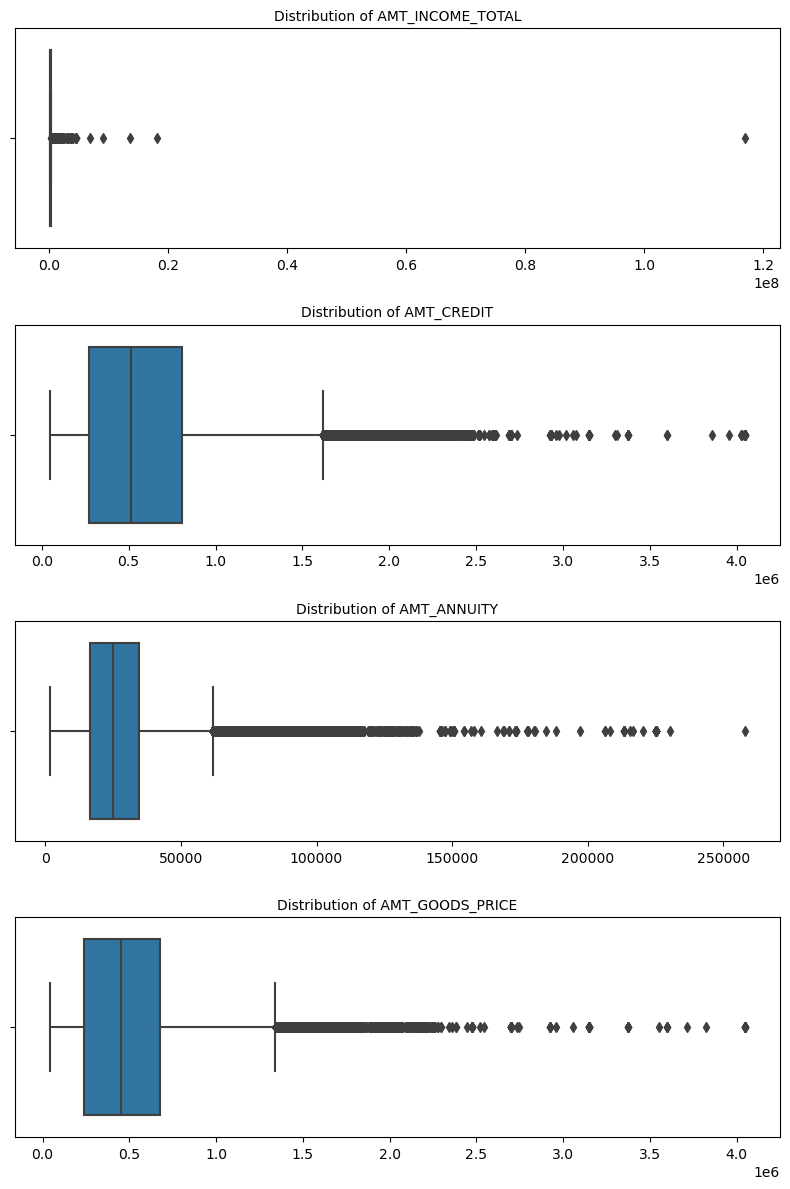

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features you might want to check for outliers
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Creating box plots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=app_train[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


In [106]:
def filter_outliers(dataframe, feature):
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering out the outliers
    filtered_data = dataframe[(dataframe[feature] >= lower_bound) & (dataframe[feature] <= upper_bound)]
    return filtered_data

# Apply the filter to each numerical feature
for feature in numerical_features:
    original_size = app_train.shape[0]
    app_train = filter_outliers(app_train, feature)
    new_size = app_train.shape[0]
    print(f'{feature} - Filtered {original_size - new_size} outliers')


AMT_INCOME_TOTAL - Filtered 14035 outliers
AMT_CREDIT - Filtered 5752 outliers
AMT_ANNUITY - Filtered 4998 outliers
AMT_GOODS_PRICE - Filtered 1868 outliers


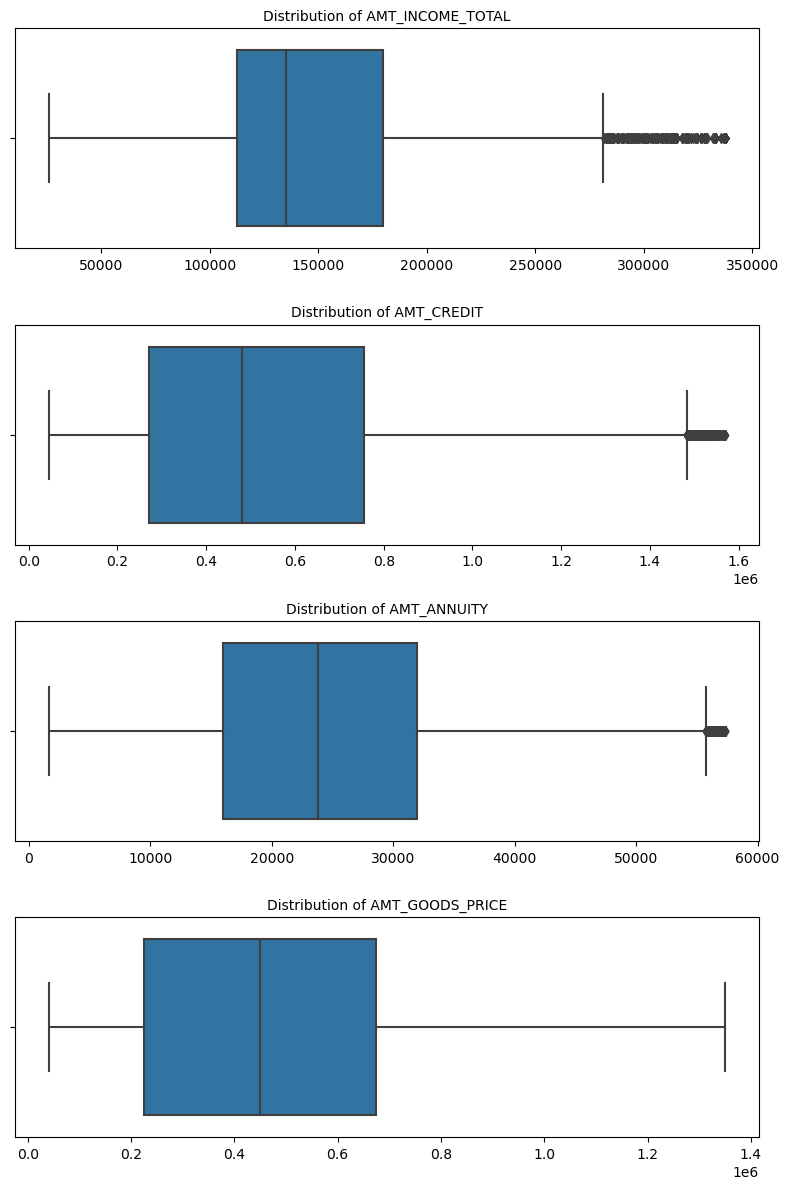

In [107]:
# Replotting a box plot for 'AMT_INCOME_TOTAL'
numerical_features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']

# Creating box plots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 12))
for i, feature in enumerate(numerical_features):
    sns.boxplot(x=app_train[feature], ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}', fontsize=10)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()


In [108]:
app_train_domain = app_train.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [116]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  

numerical_cols = app_train.select_dtypes(include=['float64', 'int64']).columns
app_train[numerical_cols] = imputer.fit_transform(app_train[numerical_cols])

In [97]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  

numerical_cols = app_train_domain.select_dtypes(include=['float64', 'int64']).columns
app_train_domain[numerical_cols] = imputer.fit_transform(app_train_domain[numerical_cols])

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume the target variable is named 'TARGET'
X = app_train.drop(columns=['TARGET'])
y = app_train['TARGET']

# Splitting the dataset into the training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Use a smaller subset of the training data for hyperparameter tuning
subsample_index = np.random.choice(X_train.index, size=int(len(X_train) * 0.1), replace=False)
X_train_subsample = X_train.loc[subsample_index]
y_train_subsample = y_train.loc[subsample_index]
# grid_log_reg.fit(X_train_subsample, y_train_subsample)
print((y_train_subsample.value_counts()))

TARGET
0.0    20545
1.0     1923
Name: count, dtype: int64


In [119]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Use the instance to resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_subsample, y_train_subsample)

print((y_train_resampled.value_counts()))

TARGET
0.0    20545
1.0    20545
Name: count, dtype: int64


In [114]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

to_scale = [col for col in app_train.columns if app_train[col].max() > 1]

app_train[to_scale] = scaler.fit_transform(app_train[to_scale])

# app_train remains a DataFrame
print(type(app_train))


<class 'pandas.core.frame.DataFrame'>


Accuracy: 0.9266


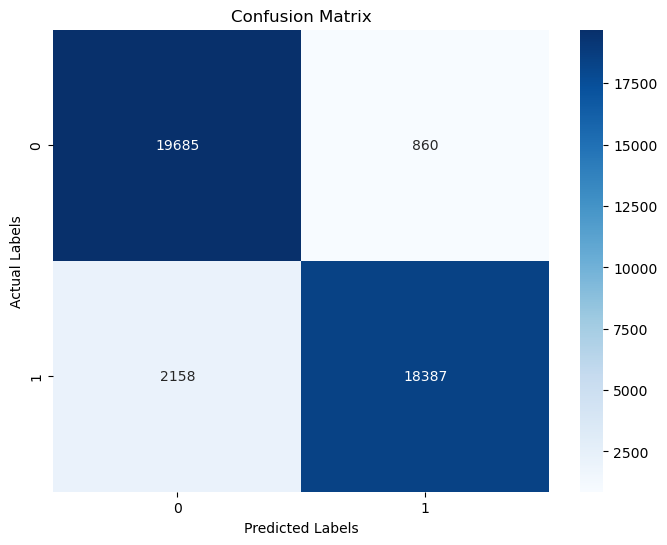

In [120]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Initializing the Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=1000)

# Training the model
model.fit(X_train_resampled, y_train_resampled)

# Making predictions
y_pred = model.predict(X_train_resampled)

# Evaluating the model
accuracy = accuracy_score(y_train_resampled, y_pred)
print(f'Accuracy: {accuracy:.4f}')

cm = confusion_matrix(y_train_resampled, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [30]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

to_scale = [col for col in app_train.columns if app_train[col].max() > 1]

app_train[to_scale] = scaler.fit_transform(app_train[to_scale])

# app_train remains a DataFrame
print(type(app_train))



<class 'pandas.core.frame.DataFrame'>


In [31]:
from sklearn.model_selection import train_test_split
print(type(app_train))

# Split the data into features and target label
X = app_train.drop(columns=['TARGET'])
y = app_train['TARGET']

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


<class 'pandas.core.frame.DataFrame'>


In [50]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Use the instance to resample the data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_subsample, y_train_subsample)

print((y_train_resampled.value_counts()))

TARGET
0.0    22631
1.0    22631
Name: count, dtype: int64


In [121]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC




In [122]:
# Logistic Regression setup
log_reg = LogisticRegression(random_state=42)
param_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10],
}


# K-Nearest Neighbors setup
knn = KNeighborsClassifier()
param_knn = {
    'n_neighbors': [5,10,15],
}

# Decision Tree setup
decision_tree = DecisionTreeClassifier(random_state=42)
param_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Support Vector Machine setup
svm = LinearSVC(random_state = 42)
params_svm = {'C': [0.001, 0.01, 0.1, 1, 10]   }

In [123]:
# Grid Search for Logistic Regression
grid_log_reg = GridSearchCV(log_reg, param_log_reg, cv=5)
grid_log_reg.fit(X_train_resampled, y_train_resampled)
print('1')

# Grid Search for K-Nearest Neighbors
grid_knn = GridSearchCV(knn, param_knn, cv=5)
grid_knn.fit(X_train_resampled, y_train_resampled)
print('2')

# Grid Search for Decision Trees
grid_decision_tree = GridSearchCV(decision_tree, param_decision_tree, cv=5)
grid_decision_tree.fit(X_train_resampled, y_train_resampled)
print('3')

# Grid Search for Support Vector Machine
grid_svm = GridSearchCV(svm, params_svm, cv=5)
grid_svm.fit(X_train_resampled, y_train_resampled)
print('4')


1
2
3
4


In [124]:
# Output the best settings and performance metrics
print("Best parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best score for Logistic Regression:", grid_log_reg.best_score_)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best score for KNN:", grid_knn.best_score_)

print("Best parameters for Decision Tree:", grid_decision_tree.best_params_)
print("Best score for Decision Tree:", grid_decision_tree.best_score_)

print("Best parameters for SVM:", grid_svm.best_params_)
print("Best score for SVM:", grid_svm.best_score_)


Best parameters for Logistic Regression: {'C': 1}
Best score for Logistic Regression: 0.8772207349720127
Best parameters for KNN: {'n_neighbors': 5}
Best score for KNN: 0.8257483572645412
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score for Decision Tree: 0.8959844244341688
Best parameters for SVM: {'C': 0.1}
Best score for SVM: 0.5


In [125]:
best_model = grid_decision_tree.best_estimator_


ROC AUC Score: 0.5427
Accuracy: 0.8437
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91     51527
         1.0       0.13      0.16      0.14      4645

    accuracy                           0.84     56172
   macro avg       0.53      0.53      0.53     56172
weighted avg       0.86      0.84      0.85     56172



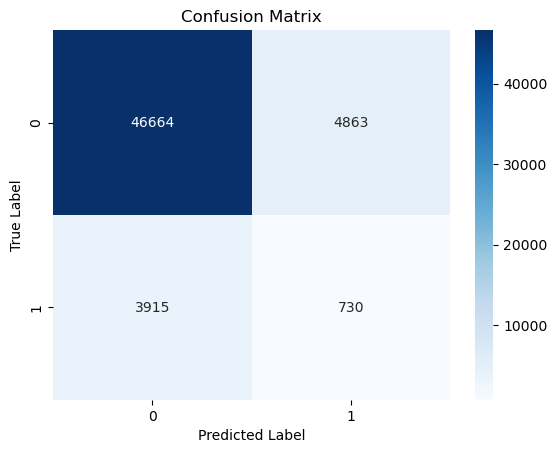

In [129]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix

y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')

# Predict class labels for accuracy and other classification metrics
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Detailed classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

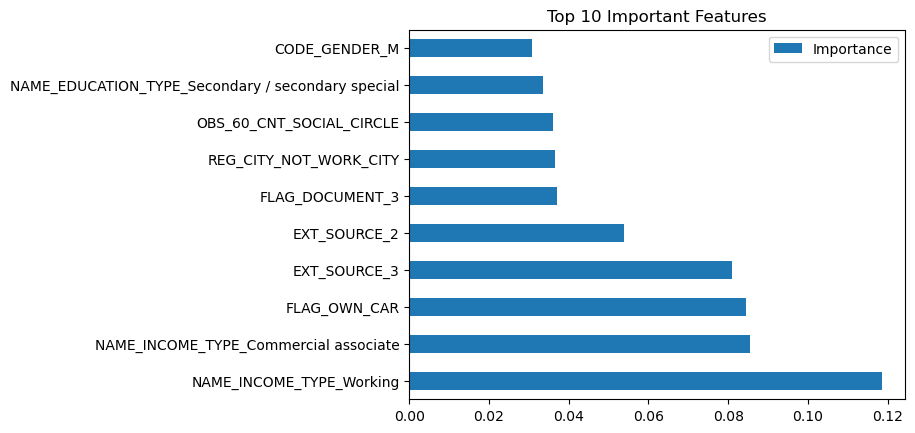

In [131]:
def plot_feature_importance(model):
    importance = pd.DataFrame(model.feature_importances_, index=X_test.columns, columns=['Importance'])
    importance.sort_values(by='Importance', ascending=False, inplace=True)
    importance.head(10).plot(kind='barh')
    plt.title('Top 10 Important Features')
    plt.show()
    
plot_feature_importance(best_model)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Example')
plt.legend(loc="lower right")
plt.show()